# Exploratory Machine Learning

In [172]:
%matplotlib inline

import numpy as np
import pandas as pd
# from scipy import stats

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.utils import shuffle

In [2]:
# import seaborn as sns
# sns.set()

In [173]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

# Get all data

In [6]:
data_df= pd.read_csv('model_feats/data.csv')

In [12]:
feats_df= pd.read_csv('model_feats/feats.csv')
target_df= pd.read_csv('model_feats/target.csv')
# target= np.array(target_df).squeeze()
Npts= len(target_df)
print "Total number of data points: %d" % Npts
print "Total number of features: %d" % len(feats_df.columns)

Total number of data points: 4803
Total number of features: 35


In [14]:
county_df= target_df.loc[:,['County','Year']]
target_df= target_df['Rate (per 10k)']

In [15]:
target_df.head()

0    448.28
1    708.98
2    221.79
3    254.14
4     51.37
Name: Rate (per 10k), dtype: float64

In [5]:
feats_df.shape

(4803, 35)

In [29]:
feats_df.columns

Index([u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian',
       u'Hispanic', u'Other', u'Good AQI', u'Moderate AQI', u'Unhealthy AQI',
       u'AQI Median', u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI',
       u'PM2.5 AQI', u'PM10 AQI', u'Area burned percent', u'Foreign born (%)',
       u'Persons per household', u'Bachelor or higher (%)',
       u'Persons without health insurance (%)', u'Median household income',
       u'Persons in poverty (%)', u'Population per square mile',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Unemployment (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)',
       u'Other (%)', u'Radon Zone', u'Population near busy roads (%)'],
      dtype='object')

In [91]:
cols= [u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian', u'Hispanic', u'Other',
       u'Good AQI', u'Moderate AQI', u'Unhealthy AQI', u'AQI Median',
       u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI', u'PM2.5 AQI', u'PM10 AQI',
       u'Population near busy roads (%)', u'Area burned percent', u'Radon Zone',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Foreign born (%)', u'Persons per household', u'Bachelor or higher (%)',
       u'Persons without health insurance (%)', u'Median household income',
       u'Persons in poverty (%)', u'Population per square mile',
       u'Unemployment (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)', u'Other (%)']

In [95]:
feats_df= feats_df.reindex(columns=cols)

In [96]:
feats_df.head()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,Good AQI,Moderate AQI,Unhealthy AQI,...,Bachelor or higher (%),Persons without health insurance (%),Median household income,Persons in poverty (%),Population per square mile,Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%)
0,1,0,0,1,0,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.9
1,1,1,0,1,0,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.9
2,0,0,0,1,0,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.9
3,0,1,0,1,0,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.9
4,1,0,0,0,1,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.9


In [97]:
feats_df.describe()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,Good AQI,Moderate AQI,Unhealthy AQI,...,Bachelor or higher (%),Persons without health insurance (%),Median household income,Persons in poverty (%),Population per square mile,Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%)
count,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,...,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,0.463877,0.545909,0.325005,0.159900,0.107016,0.264210,0.143868,0.494664,0.369574,0.135762,...,29.347720,12.996898,62613.702686,15.846533,1451.890589,12.126775,14.964179,47.176267,26.536519,11.322178
std,0.498745,0.497940,0.468426,0.366552,0.309166,0.440957,0.350993,0.263406,0.160937,0.146238,...,11.923998,2.753600,15834.940186,5.348793,3373.429267,3.153034,6.370198,11.289317,8.811652,3.887164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046575,0.000000,0.000000,...,13.100000,8.400000,35578.000000,7.500000,1.800000,7.800000,8.870000,17.630000,12.310000,4.550000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238356,0.257618,0.019178,...,19.000000,10.300000,50125.000000,11.500000,126.500000,10.000000,11.040000,39.740000,20.600000,9.390000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.512329,0.383562,0.076712,...,28.800000,13.200000,56603.000000,15.600000,344.200000,11.300000,13.150000,47.100000,26.490000,10.660000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.709589,0.471233,0.213699,...,37.700000,14.900000,75619.000000,19.500000,1465.200000,14.400000,17.150000,53.490000,32.040000,12.850000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.755495,0.532787,...,55.800000,17.400000,96310.000000,27.200000,17179.100000,28.200000,48.460000,70.000000,59.570000,22.710000


Normalize Data via a robust scaler

In [98]:
scaler= RobustScaler()

scale_feats_df= scaler.fit_transform(feats_df)
scale_feats_df= pd.DataFrame(data=scale_feats_df,index=feats_df.index,columns=feats_df.columns)

In [99]:
scale_feats_df.head()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,Good AQI,Moderate AQI,Unhealthy AQI,...,Bachelor or higher (%),Persons without health insurance (%),Median household income,Persons in poverty (%),Population per square mile,Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%)
0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.354651,-0.474544,-0.197183,...,0.759358,-0.782609,0.745901,-0.5125,1.269441,-0.136364,0.297872,-0.013091,-0.285839,1.225434
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.354651,-0.474544,-0.197183,...,0.759358,-0.782609,0.745901,-0.5125,1.269441,-0.136364,0.297872,-0.013091,-0.285839,1.225434
2,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.354651,-0.474544,-0.197183,...,0.759358,-0.782609,0.745901,-0.5125,1.269441,-0.136364,0.297872,-0.013091,-0.285839,1.225434
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.354651,-0.474544,-0.197183,...,0.759358,-0.782609,0.745901,-0.5125,1.269441,-0.136364,0.297872,-0.013091,-0.285839,1.225434
4,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.354651,-0.474544,-0.197183,...,0.759358,-0.782609,0.745901,-0.5125,1.269441,-0.136364,0.297872,-0.013091,-0.285839,1.225434


Check if there are any rows that could need a different transform

In [100]:
indsTMP= scale_feats_df.std() > 5.

print scale_feats_df.loc[:,indsTMP].std()

Area burned percent    12.417602
dtype: float64


In [101]:
indsCHECK= np.where(indsTMP)[0]

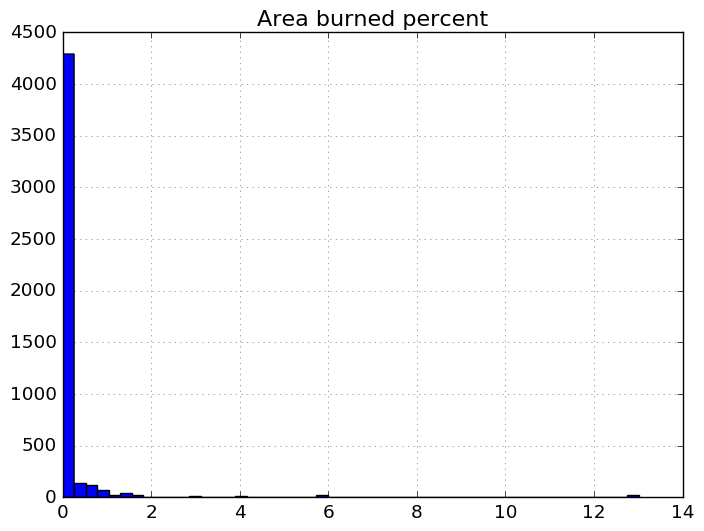

In [102]:
fig= plt.figure()

ax1=plt.subplot(111)
ax1.hist(feats_df.iloc[:,indsCHECK[0]],bins=50)
ax1.set_title(feats_df.columns[indsCHECK[0]],fontdict={'fontsize':'medium'})

Some of this data could be better described after taking a log transform: either log(data) or log(data + 0.01)

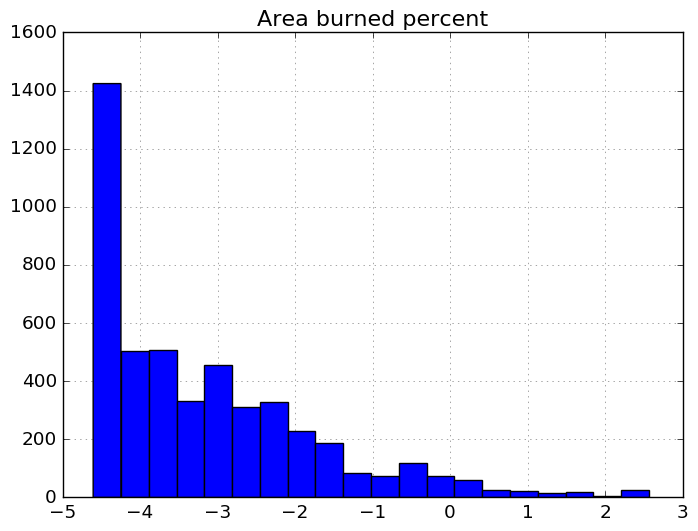

In [103]:
fig= plt.figure()

ax1=plt.subplot(111)
ax1.hist(np.log(feats_df.iloc[:,indsCHECK[0]] + 1e-2),bins=20)
ax1.set_title(feats_df.columns[indsCHECK[0]],fontdict={'fontsize':'medium'})

# Linear Regression model

Based on the tutorial by Jake Vanderplas, present on http://nbviewer.jupyter.org/github/jakevdp/sklearn_tutorial/blob/master/notebooks/Index.ipynb and on the notebook for the Programming Machine Learning Applications course, present on http://facweb.cs.depaul.edu/mobasher/classes/csc478/Notes/IPython%20Notebook%20-%20Regression.html

In [104]:
linreg = linear_model.LinearRegression()

Train the Linear Regression Model

In [105]:
linreg.fit(scale_feats_df,target_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
R2_train= linreg.score(scale_feats_df,target_df)
print 'R^2= %f' % R2_train

y_real= np.array(target_df)
y_predict= linreg.predict(scale_feats_df)

RMSE_train= np.sqrt(mean_squared_error(y_real,y_predict))
print 'RMSE= %f' % RMSE_train

R^2= 0.555620
RMSE= 99.123674


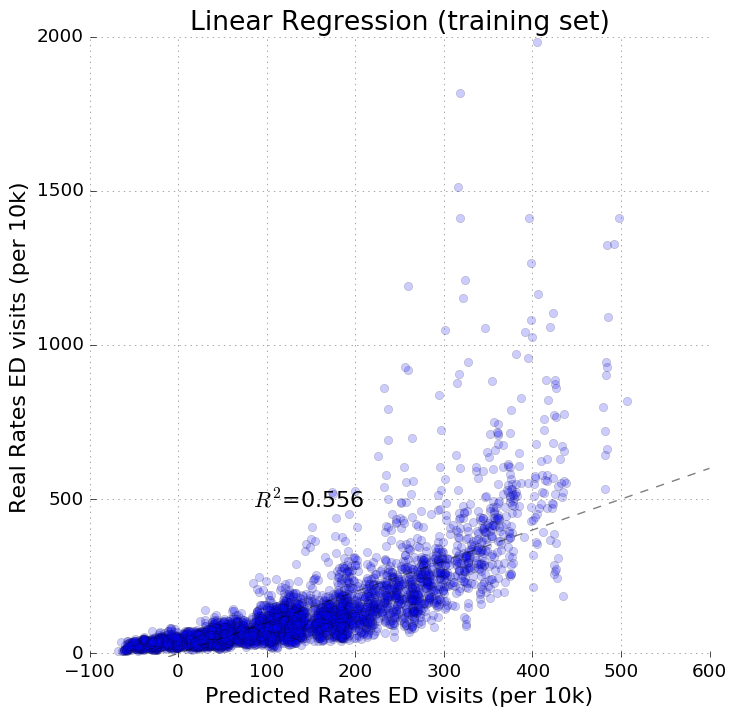

In [107]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_real,'bo',alpha=0.2)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Linear Regression (training set)')

line= r'$R^2$=%.3f' % R2_train
plt.text(85,500,line,va='center')
ax.set_ylim(ymin=-10)
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('LinearRegression_TrainingSet.png')

Regression coefficients

In [108]:
print linreg.coef_
print linreg.intercept_

[  8.14252286e+01   5.95389858e+01   1.81731531e+08   1.81731773e+08
   1.81731527e+08   1.81731537e+08   1.81731662e+08  -6.07607965e+10
  -2.75435505e+10  -2.50814916e+10  -1.57135191e+01   4.00167561e+12
   2.63876863e+11   9.20933566e+11   4.00167561e+12   1.07442249e+12
   6.56012396e+10  -4.10234966e+01   7.03954697e-03  -3.05557909e+01
   7.50127792e+00  -2.91495132e+00   4.31920013e+01   2.81672134e+01
  -1.56832085e+01   7.80340977e+01   1.71019650e+01  -1.26904182e+01
   3.63382301e+01  -2.14946890e+00   1.11380787e+01   5.90415164e+03
   1.32791452e+04   1.10483284e+04   3.32754058e+03]
-66653739992.5


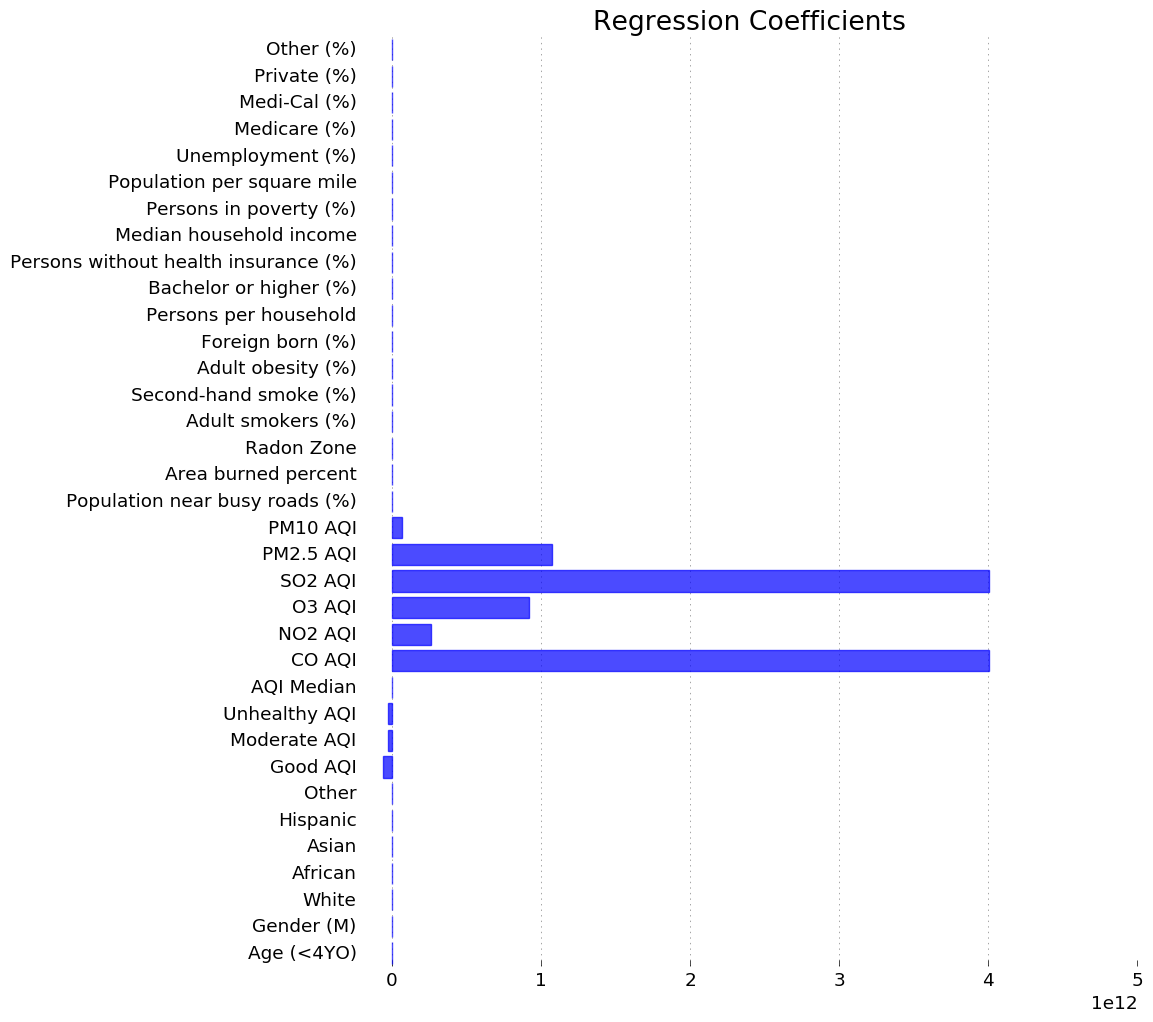

In [109]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

Nlim= len(linreg.coef_.squeeze())
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

plt.barh(indsPLT+shift, linreg.coef_.squeeze(), height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
plt.xlim(xmin=-0.2e12)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,feats_df.columns)
plt.title('Regression Coefficients')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')
# xmin,xmax= plt.xlim()
# ax.hlines(indsPLT,xmin,xmax,colors='0.75',linestyles=':')

plt.savefig('LinearRegression_TrainingSet_coeff.png')

### Using a testing set

In [149]:
new_feats_df, new_target_df= shuffle(scale_feats_df, target_df, random_state=2)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(new_feats_df, new_target_df, train_size=0.7, random_state=2)
X_train.shape, X_test.shape

((3362, 35), (1441, 35))

In [151]:
linreg_test= linear_model.LinearRegression()
linreg_test.fit(X_train,y_train)
y_predict = linreg_test.predict(X_test)

In [152]:
RMSE_train= np.sqrt(mean_squared_error(y_train, linreg_test.predict(X_train)))
RMSE_test= np.sqrt(mean_squared_error(y_test, y_predict))

In [159]:
print 'Simple Linear Regression'
print('RMSE on training: %.4f' % RMSE_train)
print('RMSE on test set: %.4f' % RMSE_test)

Simple Linear Regression
RMSE on training: 101.7217
RMSE on test set: 93.1129


In [163]:
R2_train= linreg_test.score(X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= linreg_test.score(X_test,y_test)
print 'R^2 on test set= %f' % R2_test

R^2 on training= 0.533979
R^2 on test set= 0.603663


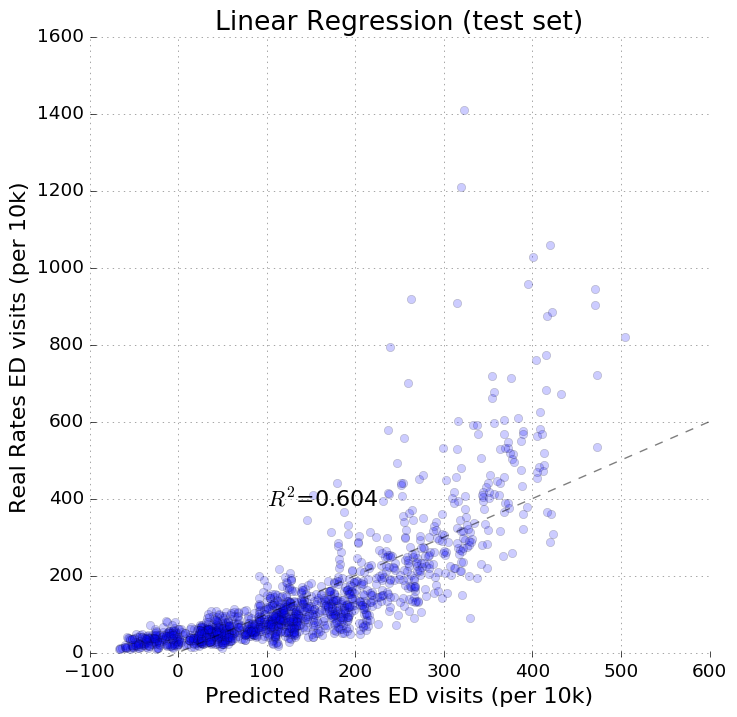

In [171]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_test,'bo',alpha=0.2)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Linear Regression (test set)')

line= r'$R^2$=%.3f' % R2_test
plt.text(100,400,line,va='center')
ax.set_ylim(ymin=-10)
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('LinearRegression_Test.png')

### Use 5-fold cross-validation

In [174]:
linreg_cv= linear_model.LinearRegression()

In [180]:
cv= cross_val_score(linreg_cv,new_feats_df,new_target_df,cv=5)
# cv= cross_val_score(linreg_cv,scale_feats_df,target_df,cv=5,scoring='neg_mean_squared_error')

In [183]:
cv.mean(),cv.std()

(0.55327185522764044, 0.030947251690447625)

In [190]:
kf = KFold(n_splits=5, shuffle=True, random_state=2)
kf_cv= kf.split(scale_feats_df)

z_predict=[]
z_real=[]
r2_cv=[]
crossval_err = 0.0
for train,test in kf_cv:
    linreg_cv.fit(scale_feats_df.iloc[train],target_df.iloc[train])

    y_predict = linreg_cv.predict(scale_feats_df.iloc[test])
    z_predict.append(y_predict)
    z_real.append(target_df.iloc[test])
    
    r2_cv.append(linreg_cv.score(scale_feats_df.iloc[test],target_df.iloc[test]))
    
    err = np.abs(y_predict - target_df.iloc[test]).squeeze()
    crossval_err += np.dot(err,err)

RMSE_5CV = np.sqrt(crossval_err/len(scale_feats_df))

In [195]:
print 'Simple Linear Regression'
print('RMSE on training: %.4f' % RMSE_train)
print('RMSE on test data: %.4f' % RMSE_test)
print('RMSE on 5-fold CV: %.4f' % RMSE_5CV)

Simple Linear Regression
RMSE on training: 101.7217
RMSE on test data: 93.1129
RMSE on 5-fold CV: 99.8412


In [197]:
print 'Simple Linear Regression'
print('R^2 on training: %.4f' % R2_train)
print('R^2 on test data: %.4f' % R2_test)
print('R^2 on 5-fold CV: %.4f' % cv.mean())
print('R^2 on 5-fold CV: %.4f' % np.mean(r2_cv))

Simple Linear Regression
R^2 on training: 0.5340
R^2 on test data: 0.6037
R^2 on 5-fold CV: 0.5533
R^2 on 5-fold CV: 0.5533
